In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, BasicAer,execute, Aer, IBMQ,QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import math
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

In [2]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_amod15(qc,qr,cr,a):
    if a == 2:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
    elif a == 7:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 8:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
    elif a == 11: # this is included for completeness
        qc.cswap(qr[4],qr[2],qr[0])
        qc.cswap(qr[4],qr[3],qr[1])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 13:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])

In [3]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_aperiod15(qc,qr,cr,a):
    if a == 11:
        circuit_11period15(qc,qr,cr)
        return
    
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled unitary
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[0])
    #   feed forward
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a mod 15
    qc.h(qr[4])
    #   controlled unitary.
    circuit_amod15(qc,qr,cr,a)
    #   feed forward
    qc.u1(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.u1(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

In [4]:
def circuit_11period15(qc,qr,cr):
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    #   feed forward
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply 11 mod 15
    qc.h(qr[4])
    #   controlled unitary.
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[1])
    #   feed forward
    qc.u1(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.u1(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

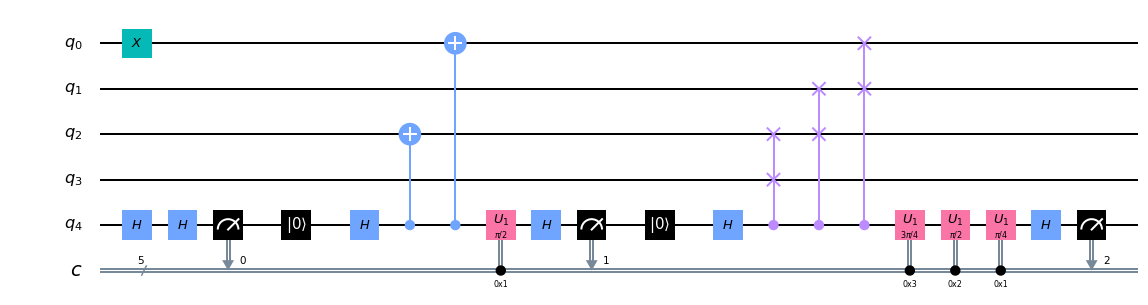

In [5]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')

shor = QuantumCircuit(q, c)
circuit_aperiod15(shor,q,c,2)
shor.draw(output='mpl')

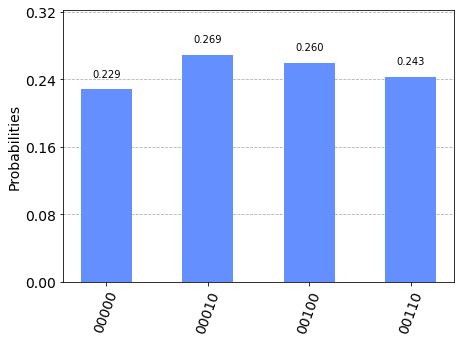

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
sim_job = execute([shor], backend)
sim_result = sim_job.result()
sim_data = sim_result.get_counts(shor)
plot_histogram(sim_data)

In [7]:
print(sim_data)

{'00010': 275, '00110': 249, '00000': 234, '00100': 266}


In [8]:
bina=[*sim_data.keys()]
print(bina)

['00010', '00110', '00000', '00100']


In [9]:
bits = []
for x in bina:
    bits.append(int(x, 2))
    
bits.remove(0)
print(bits)

[2, 6, 4]


In [10]:
def find_gcd(x, y): 
    while(y): 
        x, y = y, x % y 
  
    return x

num1=bits[0] 
num2=bits[1] 
gcd=find_gcd(num1,num2) 
  
for i in range(2,len(bits)): 
    gcd=find_gcd(gcd,bits[i]) 
      
print(gcd)

2


In [11]:
from math import log

def Check(N):

    if N % 2 == 0:
        print ("2 is a trivial factor")
        return False
        
    for k in range(2,int(log(N,2))): #log2(N)
        if (pow(N,(1/k)).is_integer()):
            print ("N =", pow(N,(1/k)), "^", k)
            return False
    
    return True

In [12]:
Check(15)

True

In [13]:
def quantum_period(a,N):
    
    n_bit = 5 #number of availables bits in the IBMQ processor
    if N >= 2**n_bit:
        print ("    Error: the number N =", N, "is too big, should be smaller than 2^" + str(n_bit),"=", 2**n_bit)
        print("\n\n")
        sys.exit(0)
    
  #---------------------------------------------------------------------------#
  #------------------------------ Quantum part -------------------------------#
  #---------------------------------------------------------------------------#
    
    print("  Searching the period for N =", N, "and a =", a)
    
    qp = QuantumProgram()
    qr = qp.create_quantum_register('qr',n_bit)   #working register
    cr = qp.create_classical_register('cr',n_bit) #register to store our measurement
    qc = qp.create_circuit('Period',[qr],[cr])
    
    
        
  
    s0 = randint(1, N-1) 
    sbin = to_binary(s0,n_bit)     # Decompose s0 in binary unit for our quantum algorithm
    print("\n      Statrting at \n      s =", s0, "=", sbin)
    
    #initialize the input with s
    for i in range(0,n_bit):
        if sbin[n_bit-i-1]:
            qc.x(qr[i])
            
    s = s0
    r=-1   
    
    # Apply the modular multiplication transformation until we come back to the same initial number s
    while np.logical_or(s != s0, r <= 0):
        
        r+=1
        qc.measure(qr, cr) 
        modular_multiplication(qc,qr,cr,a,N)
        print("done!")
        result = qp.execute('Period', shots=10)
        P = result.get_counts('Period')
        
        results = [[],[]]
        for k,v in P.items(): #the result should be deterministic but there might be some quantum calculation error so we take the most reccurent output
            results[0].append(k)
            results[1].append(int(v))
        
        index = np.argmax(np.array(results[1]))
        s_str = str(results[0][index])
        
        s = int(s_str, 2)
        print("       ",s_str[::-1])
        
        #sbin = 
        
        
        
            
    print("\n      Found period r =", r)
    return r

In [14]:
from random import randint
from math import gcd
def Shor(N):

    while True:
    
        #1) pick a random number a<N
        a = randint(1, N-1)    
        print("a=", a)
        #2) check for the GCD(a,N)
        p = gcd(a,N)
        if p != 1:  # We found a nontrivial factor
            p1 = p
            p2 = N/p
            break
        
        #3) Compute the periode r      
        r = quantum_period(a,N)  #Quantum part of the algorithm
        if r % 2 == 0 :
            if a**(r/2) % N != -1:  #If r is a goof period, we found prime factors   
                p1 = gcd(a**(r/2)-1,N)
                p2 = gcd(a**(r/2)+1,N)
                break
                
    print ("N =", p1, "*", p2)
    return p1, p2

In [15]:
Shor(15)

a= 11
  Searching the period for N = 15 and a = 11


NameError: name 'QuantumProgram' is not defined